# Жукова Юлия

Изучение датасета Spotify and Youtube  

Датасет треков различных зарубежных исполнителей, который содержит данные по количеству прослушиваний на Spotify, а также количеству просмотров официального видео на Youtube. Дополнтиельно датасет имеет ряд музыкальных мер для описания треков.

In [1]:
#загрузка библиотек
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Spotify_Youtube.csv.zip', compression='zip')

In [3]:
df.head(5)

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [4]:
#перечисление колонок
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [6]:
#подсчет уникальных значений
df.nunique()

Unnamed: 0          20718
Artist               2079
Url_spotify          2079
Track               17841
Album               11937
Album_type              3
Uri                 18862
Danceability          898
Energy               1268
Key                    12
Loudness             9417
Speechiness          1303
Acousticness         3138
Instrumentalness     4012
Liveness             1536
Valence              1293
Tempo               15024
Duration_ms         14690
Url_youtube         18154
Title               18146
Channel              6714
Views               19245
Likes               17939
Comments            10485
Description         17395
Licensed                2
official_video          2
Stream              18461
dtype: int64

In [7]:
# создаем новый датасет с нужными для изучения колонками
df1=df.copy()
df1.drop(['Url_spotify','Uri','Url_youtube','Description','Unnamed: 0', 'Licensed', 'official_video', 'Title','Channel'],axis=1,inplace=True)

In [8]:
df1.head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.177,0.00836,0.00233,0.613,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,1.040235e+09


In [9]:
#отображение размера датасета (количество строк и столбцов)
df1.shape

(20718, 19)

In [10]:
#подсчет уникальных значений
df1.nunique()

Artist               2079
Track               17841
Album               11937
Album_type              3
Danceability          898
Energy               1268
Key                    12
Loudness             9417
Speechiness          1303
Acousticness         3138
Instrumentalness     4012
Liveness             1536
Valence              1293
Tempo               15024
Duration_ms         14690
Views               19245
Likes               17939
Comments            10485
Stream              18461
dtype: int64

In [11]:
#переимнование колонок через lambda-функцию
df1 = df1.rename(columns=lambda c: c.lower().replace('-', '_').replace('/', '_').replace(' ', '_'))
df1.head(1)

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,views,likes,comments,stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.177,0.00836,0.00233,0.613,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,1.040235e+09


In [12]:
# для удобства восприятия переводим количество просмотров и прослушиваний в млн., лайков и комментариев в млн., 
# длительноть видео м/сек в минуты
df1['views_mln'] = round(df1.views/1000000, 1)
df1['likes_mln'] = round(df1.likes/1000000, 1)
df1['comments_mln'] = round(df1.comments/1000000, 1)
df1['stream_mln'] = round(df1.stream/1000000, 1)
df1['duration_min'] = round(df1.duration_ms/60000, 2)
df1.drop(['views', 'likes', 'comments', 'stream', 'duration_ms'],axis=1,inplace=True)
df1.head(1)

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,views_mln,likes_mln,comments_mln,stream_mln,duration_min
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.177,0.00836,0.00233,0.613,0.772,138.559,693.6,6.2,0.2,1040.2,3.71


In [13]:
# просмотр и удаление пропущенных значений
df1.isna().sum()

artist                0
track                 0
album                 0
album_type            0
danceability          2
energy                2
key                   2
loudness              2
speechiness           2
acousticness          2
instrumentalness      2
liveness              2
valence               2
tempo                 2
views_mln           470
likes_mln           541
comments_mln        569
stream_mln          576
duration_min          2
dtype: int64

In [14]:
df2 = df1.dropna()
df2.isna().sum()

artist              0
track               0
album               0
album_type          0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
views_mln           0
likes_mln           0
comments_mln        0
stream_mln          0
duration_min        0
dtype: int64

In [15]:
df2.shape

(19549, 19)

In [16]:
# удаление дубликатов
df3= df2.drop_duplicates(subset='track')
df3.shape

(16866, 19)

In [17]:
#вывод описательных статистик
df3.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,views_mln,likes_mln,comments_mln,stream_mln,duration_min
count,16866.000000,16866.000000,16866.000000,16866.000000,16866.000000,16866.000000,16866.000000,16866.000000,16866.000000,16866.000000,16866.000000,16866.000000,16866.000000,16866.000000,16866.000000
mean,0.619050,0.635350,5.279912,-7.677653,0.094880,0.287854,0.056587,0.191661,0.530527,120.676194,87.772785,0.607560,0.020319,130.030813,3.711480
std,0.165577,0.215155,3.574273,4.637705,0.107337,0.287661,0.193770,0.165636,0.246654,29.685312,256.271061,1.645168,0.152494,233.032617,1.547895
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.520000
25%,0.515000,0.505000,2.000000,-8.874750,0.035400,0.041500,0.000000,0.094000,0.339000,96.963750,1.800000,0.000000,0.000000,17.000000,3.010000
50%,0.636000,0.666000,5.000000,-6.551500,0.050200,0.186000,0.000003,0.124000,0.538000,119.969000,13.800000,0.100000,0.000000,48.100000,3.560000
75%,0.741000,0.800000,8.000000,-4.946000,0.103000,0.472000,0.000517,0.236000,0.729000,139.982000,66.500000,0.500000,0.000000,132.900000,4.200000
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,8079.600000,50.800000,9.100000,3386.500000,77.930000


## Группировки по категориям

### Треки

In [57]:
top5_track_YT = df3.nlargest(5, 'views_mln')
top5_track_YT

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,views_mln,likes_mln,comments_mln,stream_mln,duration_min
365,Daddy Yankee,Despacito,VIDA,album,0.655,0.797,2.0,-4.787,0.1530,0.19800,0.000000,0.0670,0.839,177.928,8079.6,50.8,4.3,1506.6,3.82
12452,Ed Sheeran,Shape of You,÷ (Deluxe),album,0.825,0.652,1.0,-3.183,0.0802,0.58100,0.000000,0.0931,0.931,95.977,5908.4,31.0,1.1,3362.0,3.90
12469,Wiz Khalifa,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),single,0.689,0.481,10.0,-7.503,0.0815,0.36900,0.000001,0.0649,0.283,80.025,5773.8,40.1,2.1,1521.3,3.83
20303,CoComelon,Wheels on the Bus,"CoComelon Kids Hits, Vol. 1",album,0.941,0.387,9.0,-11.920,0.0427,0.18400,0.000029,0.1570,0.965,125.021,4898.8,14.4,0.0,83.4,3.46
10686,Mark Ronson,Uptown Funk (feat. Bruno Mars),Uptown Special,album,0.856,0.609,0.0,-7.223,0.0824,0.00801,0.000082,0.0344,0.928,114.988,4821.0,20.1,0.6,1653.8,4.49


In [58]:
%matplotlib inline

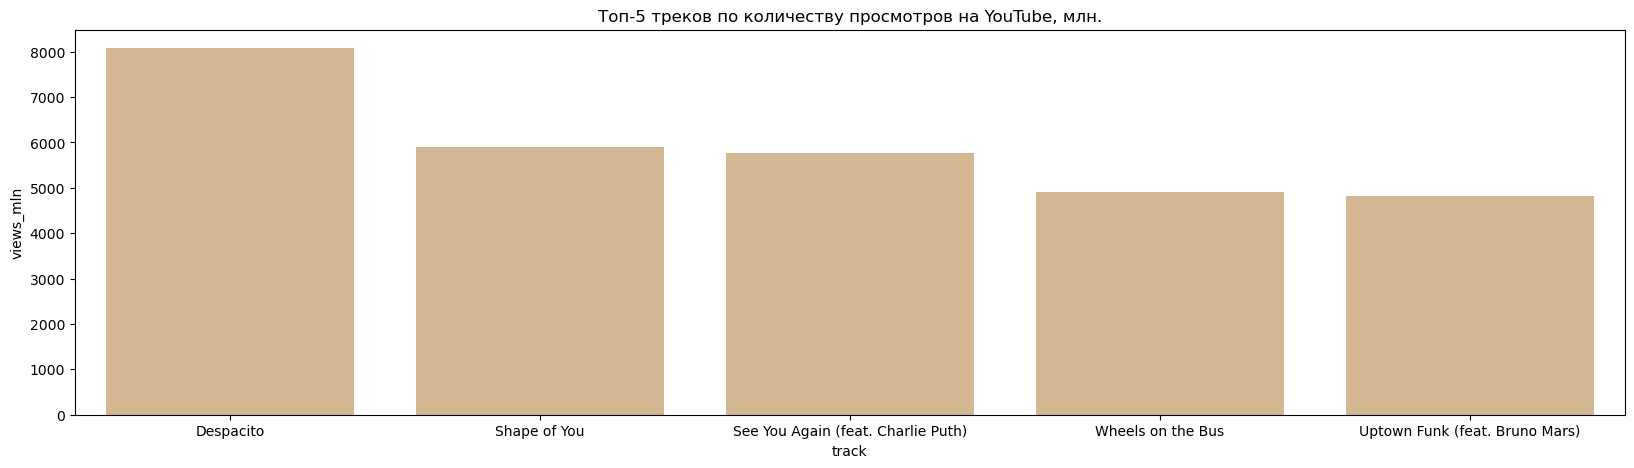

In [68]:
plt.figure(figsize = (20, 5))
sns.barplot(data=top5_track_YT, x="track", y="views_mln", color = 'burlywood')
plt.title('Топ-5 треков по количеству просмотров на YouTube, млн.')
plt.show()

In [63]:
top5_stream_SF = df3.nlargest(5, 'stream_mln')
top5_stream_SF

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,views_mln,likes_mln,comments_mln,stream_mln,duration_min
15250,The Weeknd,Blinding Lights,After Hours,album,0.514,0.730,1.0,-5.934,0.0598,0.00146,0.000095,0.0897,0.334,171.005,674.2,8.8,0.3,3386.5,3.33
12452,Ed Sheeran,Shape of You,÷ (Deluxe),album,0.825,0.652,1.0,-3.183,0.0802,0.58100,0.000000,0.0931,0.931,95.977,5908.4,31.0,1.1,3362.0,3.90
19186,Lewis Capaldi,Someone You Loved,Divinely Uninspired To A Hellish Extent,album,0.501,0.405,1.0,-5.679,0.0319,0.75100,0.000000,0.1050,0.446,109.891,586.8,7.4,0.1,2634.0,3.04
17937,Post Malone,rockstar (feat. 21 Savage),beerbongs & bentleys,album,0.585,0.520,5.0,-6.136,0.0712,0.12400,0.000070,0.1310,0.129,159.801,1060.2,12.6,0.4,2594.9,3.64
17445,Swae Lee,Sunflower - Spider-Man: Into the Spider-Verse,Hollywood's Bleeding,album,0.755,0.522,2.0,-4.368,0.0575,0.53300,0.000000,0.0685,0.925,89.960,1977.4,13.7,0.3,2538.3,2.63


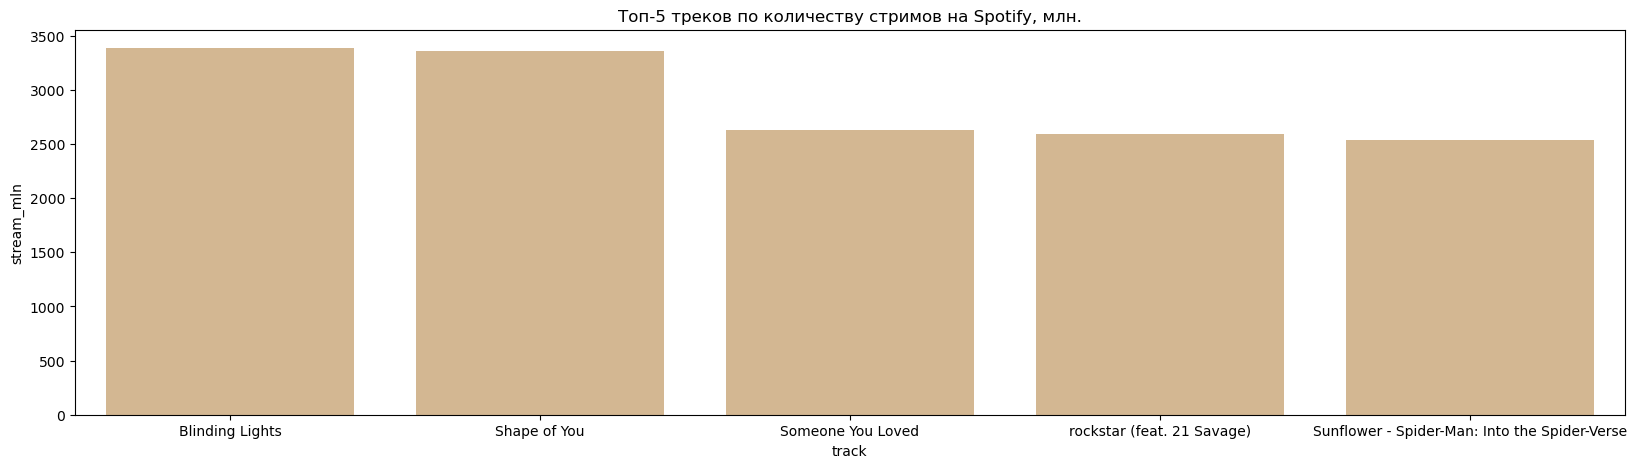

In [67]:
plt.figure(figsize = (20, 5))
sns.barplot(data=top5_stream_SF, x="track", y="stream_mln", color = 'burlywood')
plt.title('Топ-5 треков по количеству стримов на Spotify, млн.')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_6140\121032762.py:25: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_6140\121032762.py:25: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_6140\121032762.py:25: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_6140\121032762.py:25: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_6140\121032762.py:25: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.tight_layout()
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(by

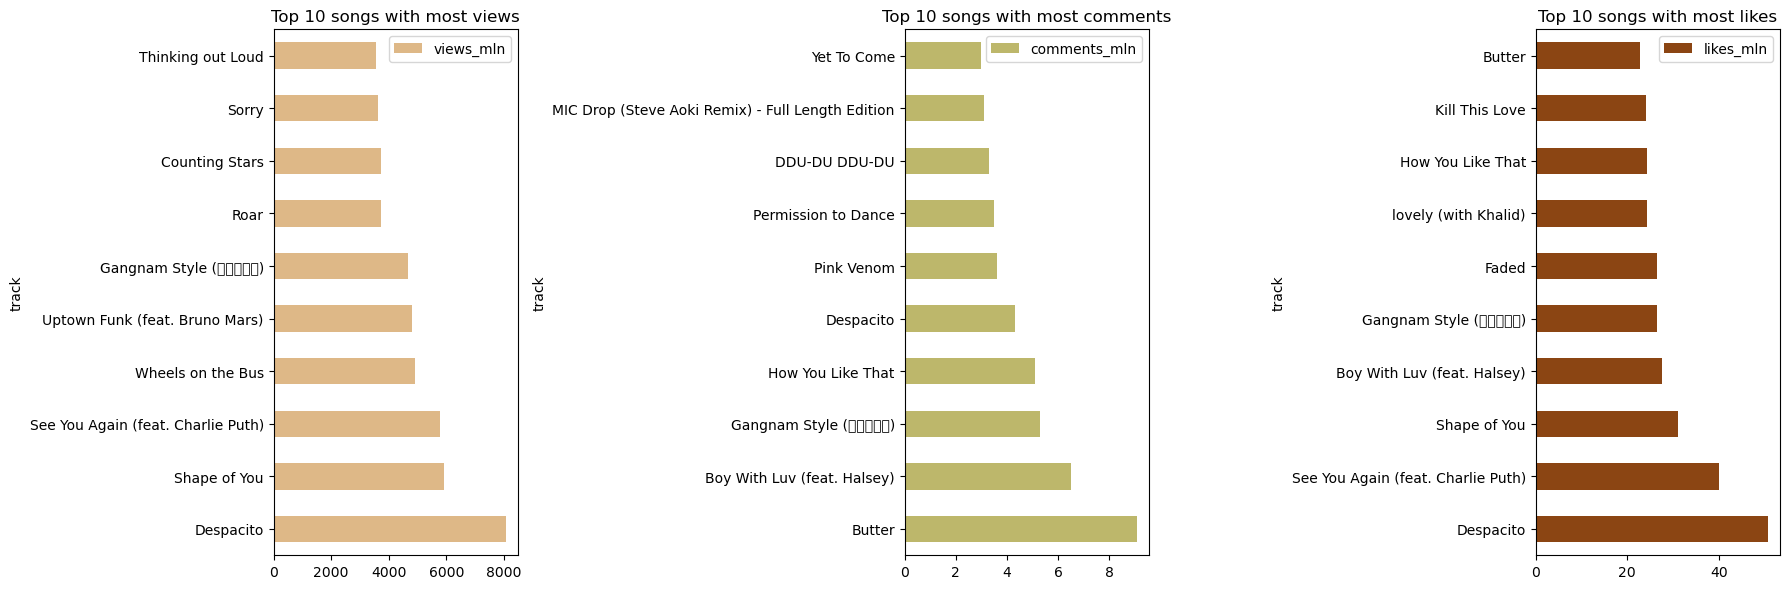

In [72]:
# Top 10 songs based on views
top10_views = df3.nlargest(10, 'views_mln')

# Top 10 songs based on comments
top10_comments = df3.nlargest(10, 'comments_mln')

# Top 10 songs based on likes
top10_likes = df3.nlargest(10, 'likes_mln')


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Top 10 songs with most views
top10_views.plot(kind='barh', x='track', y='views_mln', ax=axs[0], color = 'burlywood')
axs[0].set_title('Top 10 songs with most views')

# Top 10 songs with most comments
top10_comments.plot(kind='barh', x='track', y='comments_mln', ax=axs[1], color = 'darKkhaki')
axs[1].set_title('Top 10 songs with most comments')

# Top 10 songs with most likes
top10_likes.plot(kind='barh', x='track', y='likes_mln', ax=axs[2], color = 'saddlebrown')
axs[2].set_title('Top 10 songs with most likes')

fig.tight_layout()

plt.show()

### Испонители

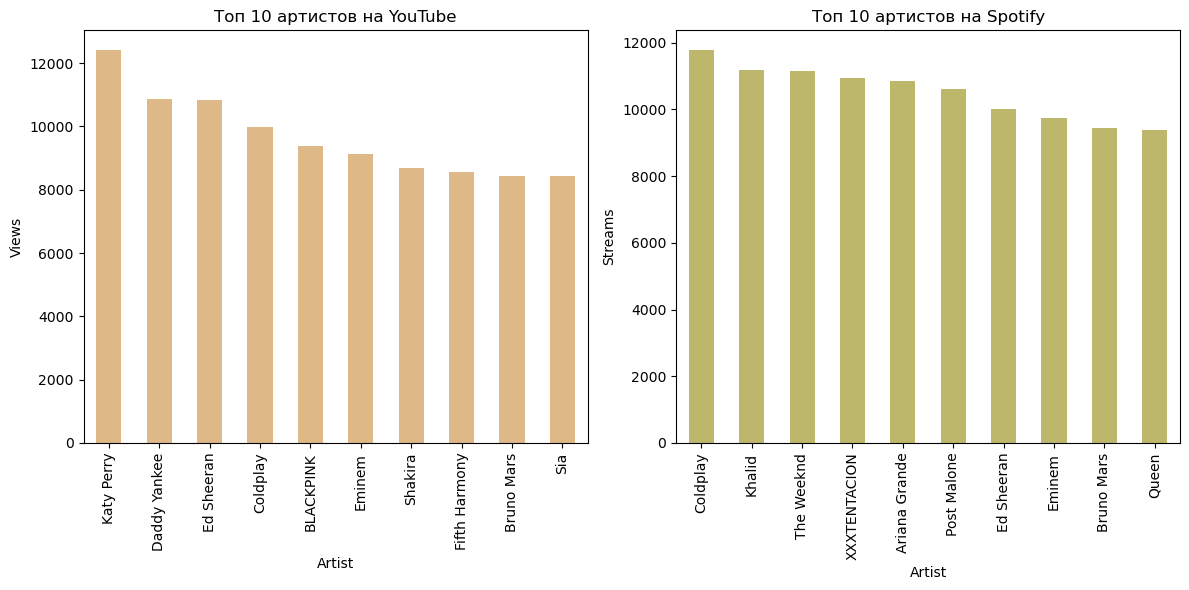

In [69]:
# Create two separate DataFrames for views and streams
df_views = df3.groupby('artist')['views_mln'].sum().sort_values(ascending=False)[:10]
df_streams = df3.groupby('artist')['stream_mln'].sum().sort_values(ascending=False)[:10]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# top 10 yt
ax1.set_title('Топ 10 артистов на YouTube')
df_views.plot(kind='bar', ax=ax1, color = 'burlywood')

# top 10 spotofy
ax2.set_title('Топ 10 артистов на Spotify')
df_streams.plot(kind='bar', ax=ax2, color = 'darKkhaki')


ax1.set_xlabel('Artist')
ax1.set_ylabel('Views')
ax2.set_xlabel('Artist')
ax2.set_ylabel('Streams')
fig.tight_layout()
plt.show()

### Альбомы

In [70]:
album_type = df3.groupby('album_type', as_index = False).agg({'artist': 'count'}).rename(columns = {'artist':'count_type'})
album_type

,album_type,count_type
0,album,12543
1,compilation,591
2,single,3732


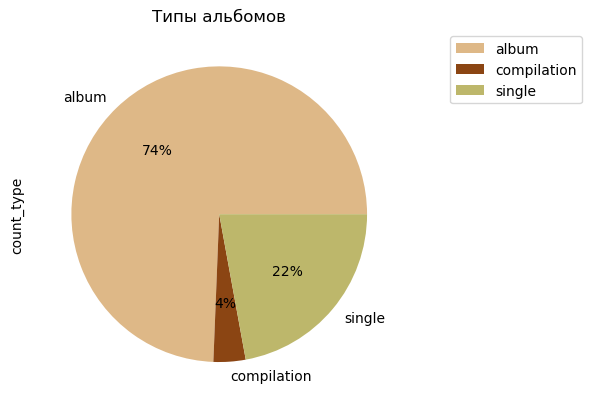

In [71]:
album_type.set_index('album_type').plot.pie(y='count_type',colors=["burlywood", "saddlebrown","darKkhaki"], autopct='%1.0f%%').legend(bbox_to_anchor=(1.5, 1))
plt.title('Типы альбомов')
plt.show()

Круговая диаграмма представляет собой распределение различных типов музыкальных релизов, при этом доля альбомов в большинстве релизов составляет 74%. Синглы составляют 22% релизов, а компиляции составляют оставшиеся 4%. Это указывает на то, что альбомы являются наиболее популярной формой музыкального выпуска, за ними следуют синглы, а затем сборники.

### scatter_plot

Text(0.5, 1.0, 'Зависимость между количество лайков и просмотров, млн.')

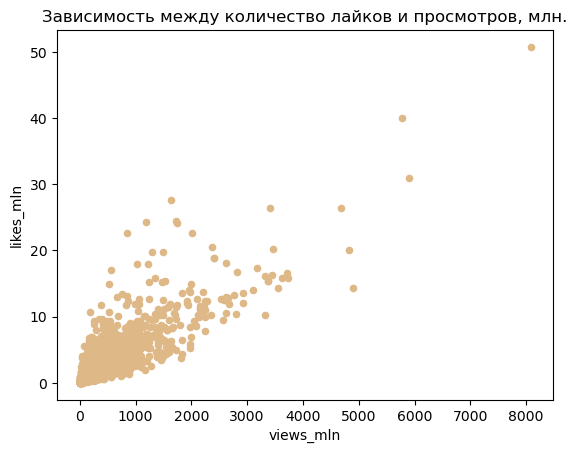

In [76]:
ax1 = df3.plot.scatter(x='views_mln',
                      y='likes_mln',
                      c='burlywood')
plt.title('Зависимость между количество лайков и просмотров, млн.')

### Тепловая карта

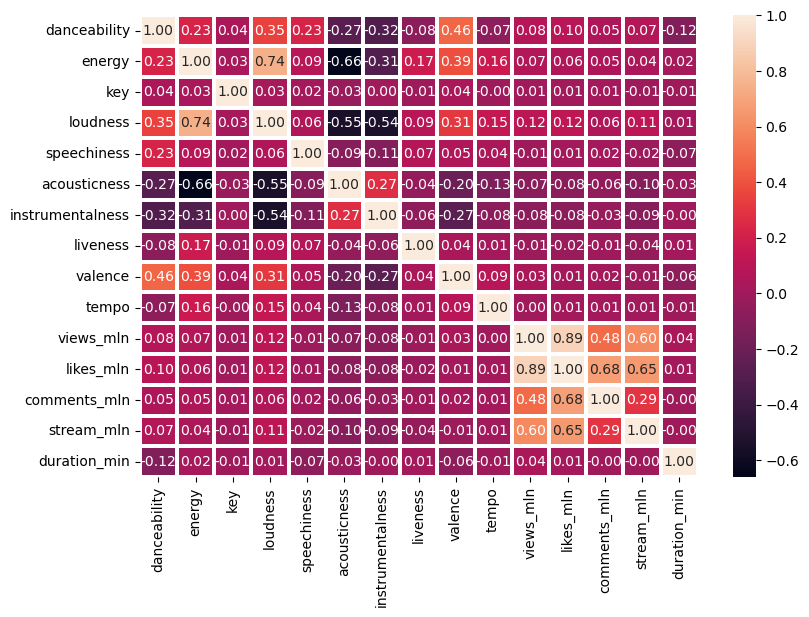

In [75]:
corr = df3.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

Выявлена связь между количеством просмотров и количеством лайков (k=0,89), а также слабая связь между количество просмотров и количеством комментариев (k=0,48), между количеством просмотров на YouTube и прослушиваний на Spotify (k=0,60).   
Влияние музыкальных характеристик на количество просмотров на YouTube не выявлено.

### Регрессионный анализ

In [77]:
from scipy import stats
import statsmodels.api as sm

In [78]:
X = df3.views_mln
Y = df3.likes_mln

In [79]:
X = sm.add_constant(X)  # добавить константу, чтобы был свободный член
model = sm.OLS(Y, X)  # говорим модели, что у нас ЗП, а что НП
results = model.fit()  # строим регрессионную прямую
print(results.summary())  # смотрим результат

                            OLS Regression Results                            
Dep. Variable:              likes_mln   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                 6.462e+04
Date:                Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                        14:04:53   Log-Likelihood:                -19044.
No. Observations:               16866   AIC:                         3.809e+04
Df Residuals:                   16864   BIC:                         3.811e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1058      0.006     17.363      0.0

Нулевая гипотеза о том, что связи между количеством лайков и количеством просмотров нет, отклоняется - p-value<0.05. Принимается альтерантивная. Коэффициент детерминации - 0,793. Т.е. выбранная модель объясняте 79,3% дисперсии.  
При изменении количества просмотров на 10 000, количество лайков увеличеватся на 1058.

### Множественная регрессия

In [82]:
# Выберем топ-100 треков по количеству прослушиваний и попробуем выявить зависимость музыкальных мер на количество просмотров
top100_stream = df3.nlargest(100, 'stream_mln')
top100_stream

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,views_mln,likes_mln,comments_mln,stream_mln,duration_min
15250,The Weeknd,Blinding Lights,After Hours,album,0.514,0.730,1.0,-5.934,0.0598,0.00146,0.000095,0.0897,0.334,171.005,674.2,8.8,0.3,3386.5,3.33
12452,Ed Sheeran,Shape of You,÷ (Deluxe),album,0.825,0.652,1.0,-3.183,0.0802,0.58100,0.000000,0.0931,0.931,95.977,5908.4,31.0,1.1,3362.0,3.90
19186,Lewis Capaldi,Someone You Loved,Divinely Uninspired To A Hellish Extent,album,0.501,0.405,1.0,-5.679,0.0319,0.75100,0.000000,0.1050,0.446,109.891,586.8,7.4,0.1,2634.0,3.04
17937,Post Malone,rockstar (feat. 21 Savage),beerbongs & bentleys,album,0.585,0.520,5.0,-6.136,0.0712,0.12400,0.000070,0.1310,0.129,159.801,1060.2,12.6,0.4,2594.9,3.64
17445,Swae Lee,Sunflower - Spider-Man: Into the Spider-Verse,Hollywood's Bleeding,album,0.755,0.522,2.0,-4.368,0.0575,0.53300,0.000000,0.0685,0.925,89.960,1977.4,13.7,0.3,2538.3,2.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14039,Bruno Mars,When I Was Your Man,Unorthodox Jukebox,album,0.612,0.280,0.0,-8.648,0.0434,0.93200,0.000000,0.0880,0.387,72.795,1237.5,6.8,0.2,1439.6,3.56
449,Mariah Carey,All I Want for Christmas Is You,Merry Christmas,album,0.336,0.627,7.0,-7.463,0.0384,0.16400,0.000000,0.0708,0.350,150.273,753.2,3.9,0.2,1438.0,4.02
17944,Post Malone,I Fall Apart,Stoney (Deluxe),album,0.556,0.538,8.0,-5.408,0.0382,0.06890,0.000000,0.1960,0.291,143.950,2.1,0.0,0.0,1434.0,3.72
17231,Doja Cat,Kiss Me More (feat. SZA),Planet Her,album,0.764,0.705,8.0,-3.463,0.0284,0.25900,0.000089,0.1200,0.781,110.970,398.0,4.6,0.1,1432.4,3.48


In [84]:
top100_stream.columns

Index(['artist', 'track', 'album', 'album_type', 'danceability', 'energy',
       'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'views_mln', 'likes_mln',
       'comments_mln', 'stream_mln', 'duration_min'],
      dtype='object')

In [86]:
X1 = top100_stream[['danceability','energy','key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']]

In [87]:
Y1=top100_stream.stream_mln

In [88]:
X1 = sm.add_constant(X1)  # добавить константу, чтобы был свободный член
model = sm.OLS(Y1, X1)  # говорим модели, что у нас ЗП, а что НП
results = model.fit()  # строим регрессионную прямую
print(results.summary())  # смотрим результат

                            OLS Regression Results                            
Dep. Variable:             stream_mln   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.7728
Date:                Sun, 28 May 2023   Prob (F-statistic):              0.654
Time:                        14:20:24   Log-Likelihood:                -729.69
No. Observations:                 100   AIC:                             1481.
Df Residuals:                      89   BIC:                             1510.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2964.9025    626.045  

Значение p-value большинства предикторов повзоляет нам принять нулевую гипотезу о том, что связи нет, за исключением 2 мер: energy (энергичность) и loudness (общая громкость дорожки). Предполагается влияние этих факторов (p-value <0.05).           

In [101]:
import scipy.stats as st
from scipy import stats
import statsmodels.api as sm

### Коэффициент корреляции Пирсона

In [97]:
x = df3.views_mln
y = df3.likes_mln

In [98]:
np.corrcoef(x, y)

array([[1.        , 0.89052297],
       [0.89052297, 1.        ]])

In [99]:
st.pearsonr(x, y)

PearsonRResult(statistic=0.8905229655397171, pvalue=0.0)

Коэффициент корреляции 0,89, связь сильная. P-value<0.5, значит отклоняем нулевую гипотезу, что связи нет, и принимаем альтернативную.

### Ящик с усами

<AxesSubplot:>

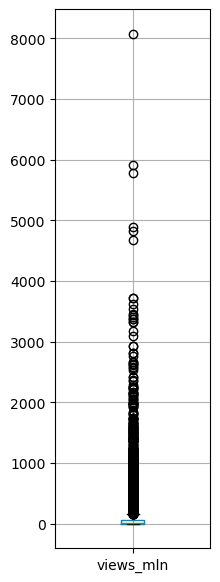

In [90]:
df3.boxplot(column=['views_mln'], figsize = (2, 7))

Исходя из описательной статистики и графика, можно сделать выврод, что распределение количества просмотров весьма неравномерно. Так среднее количество просмотров - 87,8 млн, медиана - 13,8 млн., 75перцентиль - 66,5 млн, а максимальное значение 8079,6 млн.   
Проведем дополнительные вычисления:

In [91]:
# выделим датасет с количеством просмотров более 1 млрд.
df_1bln = df3.query('views_mln > 1000')
df_1bln.shape

(212, 19)

In [92]:
df3.shape

(16866, 19)

In [93]:
round(212/16866*100, 1)

1.3

Таким образом, только 1,3% треков имеют количество просмотров более 1 млрд.

<AxesSubplot:ylabel='Frequency'>

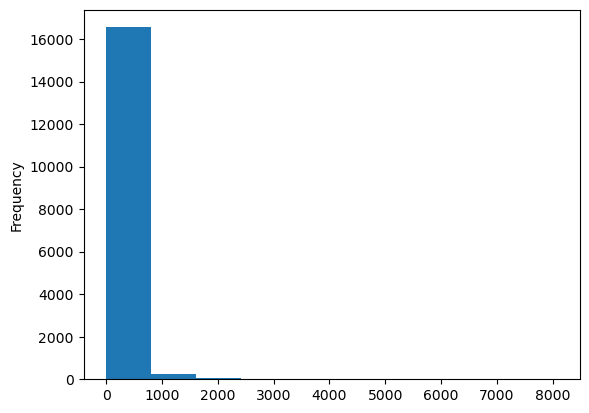

In [94]:
df3.views_mln.plot.hist()

Музыка — это универсальный язык, который объединяет людей разных культур и поколений. Но как люди выбирают, какую музыку слушать и где ее слушать?  
Изучив данный датасет, было обнаружено, что существует четкая разница между самыми популярными песнями на Spotify и YouTube: у лучших песен на YouTube больше просмотров, но не обязательно больше всего прослушиваний на Spotify. Можно предположить, что это потому что YouTube предлагает больше разнообразия, больше визуальных эффектов или больше взаимодействия. Возможно это и потому, что у пользователей Spotify разные вкусы, другое настроение или разные привычки.  
Какие треки становятся самыми популярными и "взрывают" танцполы всего мира? Какая "магическая формула" хита? С этой целью данный  датасет был проанализирован с точки зрения влияния различных музыкальных мер на количество просмотров и прослушиваний. Какого-либо значимого влияние выявлено не было, за исключением положительнаой корреляции между громкостью, энергичностью трека и количеством прослушиваний на Spotify. Также была выявлена логичная взаимосвязь между количеством просмотров и количеством лайков на YouTube. Т.е. музыка - это гармония чисел))

In [61]:
# записать файла в csv-формат для работы в BI
df3.to_csv('spotifyYT', index=False)

Датасет содержит 28 столбцов:
1.	Unnamed: ID строки / индекс;
2.	Artist: имя артиста;
3.	Url_spotify: ссылка на артиста;
4.	Track: название песни на платформе Spotify;
5.	Album: название альбома;             
6.	Album_type: указывает, выпущена ли песня на Spotify как сингл или включена в альбом;
7.	Uri: ссылка Spotify, используемая для поиска песни через API;             
8.	Danceability: описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу удара и общую регулярность. Значение 0,0 соответствует наименее танцевальному, а значение 1,0 — наиболее танцевальному (танцевальность);
9.	Energy: представляет собой меру от 0,0 до 1,0 и представляет перцептивную меру интенсивности и активности. Как правило, энергичные треки кажутся быстрыми, громкими и шумными. Например, у хэви-метала высокая энергия, а у прелюдии Баха низкий балл по шкале. Характеристики восприятия, влияющие на этот атрибут, включают динамический диапазон, воспринимаемую громкость, тембр, скорость начала и общую энтропию (энергичность);           
10.	Key: тональность, в которой находится дорожка. Целые числа сопоставляются с высотами тона, используя стандартную нотацию класса высоты тона. Например, 0 = C, 1 = C♯/D♭, 2 = D и так далее. Если ключ не обнаружен, значение равно -1 (тональность);
11.	Loudness: общая громкость дорожки в децибелах (дБ). Значения громкости усредняются по всей дорожке и полезны для сравнения относительной громкости дорожек. Громкость – это качество звука, которое является основным психологическим коррелятом физической силы (амплитуды). Обычно значения находятся в диапазоне от -60 до 0 дБ (громкость);
12.	Speechiness: определяет наличие произнесенных слов в дорожке. Чем больше запись похожа на речь (например, ток-шоу, аудиокнига, поэзия), тем значение атрибута ближе к 1,0. Значения выше 0,66 описывают треки, которые, вероятно, полностью состоят из произнесенных слов. Значения от 0,33 до 0,66 описывают треки, которые могут содержать как музыку, так и речь, либо по частям, либо по слоям, включая такие случаи, как рэп. Значения ниже 0,33, скорее всего, представляют музыку и другие треки, не похожие на речь (наличие речи);
13.	 Acousticness: показатель от 0,0 до 1,0 того, является ли трек акустическим. 1.0 означает, что трек является акустическим (акустичность);
14.	Instrumentalness: указывает, содержит ли трек вокал. Звуки «ооох» и «ааа» в этом контексте рассматриваются как инструментальные. Треки в стиле рэп или разговорные слова явно «вокальные». Чем ближе значение инструментальности к 1,0, тем больше вероятность того, что трек не содержит вокального содержания. Значения выше 0,5 предназначены для представления инструментальных треков, но достоверность выше, когда значение приближается к 1,0 (инструментальность);
15.	Liveness: присутствие аудитории в записи. Более высокие значения живучести представляют собой повышенную вероятность того, что трек был исполнен вживую. Значение выше 0,8 дает высокую вероятность того, что трек записан «вживую» (живой звук);
16.	Valence: показатель от 0,0 до 1,0, описывающий музыкальную позитивность, передаваемую треком. Треки с высокой валентностью звучат более позитивно (например, счастливые, веселые, эйфорические), в то время как треки с низкой валентностью звучат более негативно (например, грустные, подавленные, злые) (валентность/жизнерадостность);
17.	Tempo: общий предполагаемый темп дорожки в ударах в минуту (BPM). В музыкальной терминологии темп — это скорость или темп данного произведения, напрямую зависящий от средней продолжительности долей (темп);
18.	Duration_ms: продолжительность трека в м/сек;
19.	Url_youtube: ссылка на видео в YT, если она есть;
20.	Title: название видеоклипа на YT;
21.	Channel: название канала, который опубликовал видео;
22.	Views: количество просмотров;
23.	Likes: количество лайков;
24.	Comments: количество комментариев;
25.	Description: описание видео на YT;
26.	Licensed: указывает, представляет ли видео лицензионный контент, что означает, что контент был загружен на канал, связанный с контент-партнером YouTube, и затем заявлен этим партнером;
27.	official_video: логическое значение, указывающее, является ли найденное видео официальным видео песни;
28.	Stream: количество прослушиваний песни на Spotify.

